# Observe the data

In [1]:
# loading the csv file via pandas

import pandas as pd

buy_record = pd.read_csv('../rs.csv')

In [3]:
# check out the file situation
# head() is the fore 5 record# total transaction amount

buy_record.head()  

,Unnamed: 0,user,item,qty,datetime
0,0,32011003635952,16198,1,2014-01-01 0:39:00
1,1,32009100468450,18107,4,2014-01-01 1:07:00
2,2,32013007873699,13612,2,2014-01-01 7:00:00
3,3,32011004803503,42496,1,2014-01-01 7:06:00
4,4,32011004221857,8875,4,2014-01-01 7:09:00


In [4]:
# total transaction(records) amount

buy_record.count()

Unnamed: 0    242124
user          242124
item          242124
qty           242124
datetime      242124
dtype: int64

In [7]:
# total number of user
# unique() means for no duplicated one

buy_record.user.unique()  # -> it's a list

len(buy_record.user.unique())

2000

In [8]:
# calculated for correlation

buy_record.corr()


,Unnamed: 0,user,item,qty
Unnamed: 0,1.000000,0.017753,0.047111,0.001413
user,0.017753,1.000000,-0.001021,-0.000806
item,0.047111,-0.001021,1.000000,-0.009597
qty,0.001413,-0.000806,-0.009597,1.000000


# Try analyzing the data

In [10]:
# Making the data into a sparse matrix
# using get_dummies() , it'll outcome a matrix with buying records in row and unique user in column; to represent the one-hot-encoding

pd.get_dummies(buy_record.user).head()

,32009000000620,32009000001559,32009000002334,32009000006899,32009000030191,32009000036339,32009000055545,32009000055965,32009000060167,32009000084675,...,32013010597827,32013010603924,32013010609117,32013010645054,32013010774648,32013010785118,32013010804444,32013010956006,32013010959717,32013011034017
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# merge the two needed columns from each dataframe together

df = pd.get_dummies(buy_record.user)
train = pd.concat([buy_record.qty, df], axis = 1)
train.head()

,qty,32009000000620,32009000001559,32009000002334,32009000006899,32009000030191,32009000036339,32009000055545,32009000055965,32009000060167,...,32013010597827,32013010603924,32013010609117,32013010645054,32013010774648,32013010785118,32013010804444,32013010956006,32013010959717,32013011034017
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# data pre-processing 
# LabelEncoder() : Encode labels with value between 0 and n_classes-1

from sklearn import preprocessing

y = buy_record.item
le = preprocessing.LabelEncoder()
le.fit(y)
le.transform(y)
## le.inverse_transform([0, 0, 1, 2]) ## transform the result inversed


array([633, 695, 535, ..., 255, 799, 370], dtype=int64)

In [13]:
# Set the training pre-processed result
train_y = le.transform(y)

In [15]:
le.inverse_transform(train_y)

array([16198, 18107, 13612, ...,  9458, 19917, 10751], dtype=int64)

### plotting function

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10,6))  #調整作圖大小
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

###  Decision tree

In [18]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini',max_depth=3)

### K-fold cross validation & learning curve

<module 'matplotlib.pyplot' from 'C:\\Users\\hsuan\\Anaconda3\\envs\\myproject\\lib\\site-packages\\matplotlib\\pyplot.py'>

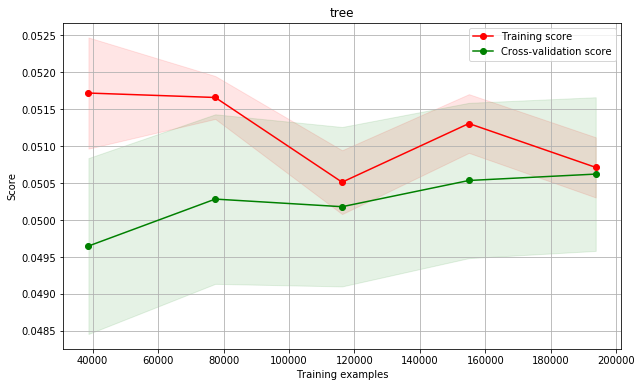

In [19]:
from sklearn.model_selection import KFold,StratifiedKFold


cv = KFold(n_splits=5, random_state=None, shuffle=True)
estimator = tree  #model可更換
plot_learning_curve(estimator, "tree", train, train_y, cv=cv,train_sizes=np.linspace(0.2, 1.0, 5)) #切分資料

In [21]:
from sklearn.model_selection import cross_val_predict
clf = DecisionTreeClassifier(criterion='gini',max_depth=3)
predicted = cross_val_predict(clf, train, train_y, cv=5)
metrics.accuracy_score(train_y, predicted)

0.050358493994812577

## split dataset testSet

In [23]:
from sklearn.model_selection import cross_val_score, train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, train_y, test_size = 0.3, random_state = 0)

In [24]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini',max_depth=3)
tree.fit(X_train, y_train) # fit : training model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [25]:
y_pred = tree.predict(X_test) # predict : testing data

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.050786089925383408

# AUC

In [27]:
import numpy as np
from sklearn import metrics


fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)
metrics.auc(fpr, tpr)

0.50129435578260328